<a href="https://colab.research.google.com/github/Gitinitty-5/Python-Projects/blob/main/Forage__project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task Overview
*Understand how to examine and clean transaction and customer data.
*Learn to identify customer segments based on purchasing behavior.
*Gain experience in creating charts and graphs to present data insights.
*Learn how to derive commercial recommendations from data analysis.
*Analyze transaction and customer data to identify trends and inconsistencies.
*Develop metrics and examine sales drivers to gain insights into overall sales performance.
*Create visualizations and prepare findings to formulate a clear recommendation for the client's strategy.



1.INSTALLING PACKAGES

In [43]:
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

2.UPLOAD FILES

In [44]:
from google.colab import files
uploaded = files.upload()

Saving QVI_purchase_behaviour.xlsx to QVI_purchase_behaviour (1).xlsx
Saving QVI_transaction_data.xlsx to QVI_transaction_data (1).xlsx


#LOAD DATA

In [45]:
df1 = pd.read_excel("QVI_purchase_behaviour.xlsx")
df2 = pd.read_excel("QVI_transaction_data.xlsx")

#Merge Data

In [46]:
import pandas as pd

# Load the data
df1 = pd.read_excel("QVI_purchase_behaviour.xlsx")
df2 = pd.read_excel("QVI_transaction_data.xlsx")

# Merge the dataframes on the 'LYLTY_CARD_NBR' column
merged_df = pd.merge(df2, df1, on='LYLTY_CARD_NBR', how='left')

# Display the first few rows of the merged dataframe
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [47]:
merged_df.shape

(264836, 10)

In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [49]:
merged_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


#Check for nulls

In [50]:
merged_df.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


#Check and Detect Outliers

In [51]:
# Select the column to analyze (e.g., 'TOT_SALES')
numeric_column = 'TOT_SALES'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = merged_df[numeric_column].quantile(0.25)
Q3 = merged_df[numeric_column].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect rows with outliers
outliers = merged_df[(merged_df[numeric_column] < lower_bound) | (merged_df[numeric_column] > upper_bound)]

print("Number of outliers detected:", len(outliers))

Number of outliers detected: 578


#Remove Outliers

In [52]:
# Remove outliers from the DataFrame
cleaned_df = merged_df[(merged_df[numeric_column] >= lower_bound) & (merged_df[numeric_column] <= upper_bound)]

print("Number of rows after removing outliers:", len(cleaned_df))

Number of rows after removing outliers: 264258


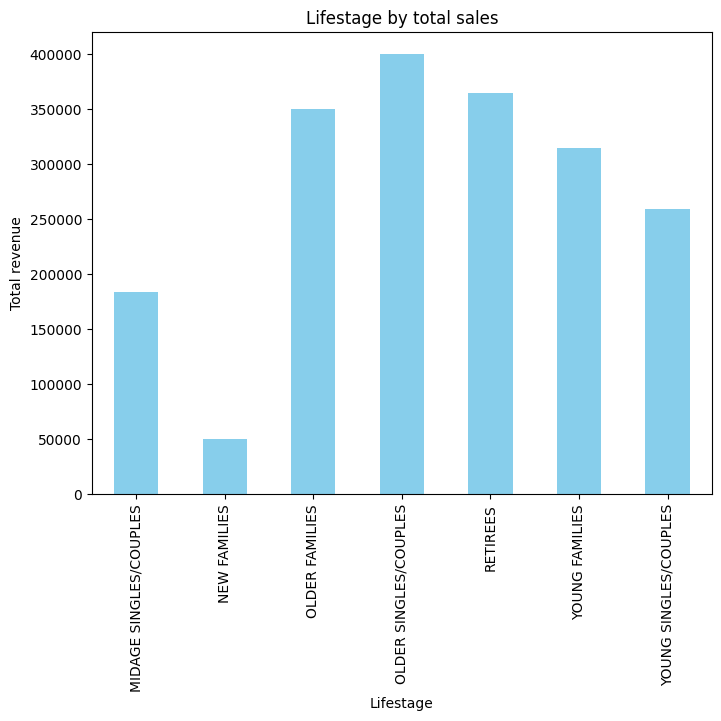

In [53]:
import matplotlib.pyplot as plt

#plot bar graph of 'LIFESTAGE' by 'TOTAL SALES'
sales =cleaned_df.groupby(['LIFESTAGE'])['TOT_SALES'].sum()
plt.figure(figsize=(8,6))
sales.plot(kind= 'bar', color = 'skyblue')
plt.title('Lifestage by total sales')
plt.ylabel('Total revenue')
plt.xlabel('Lifestage')
plt.show()

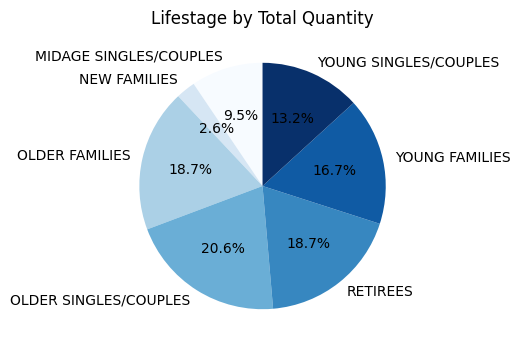

In [54]:
import matplotlib.pyplot as plt

# Group the data by 'LIFESTAGE' and Product Quantity'
sales = cleaned_df.groupby(['LIFESTAGE'])['PROD_QTY'].sum()

# Plot pie chart
plt.figure(figsize=(6, 4))
sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Blues')
plt.title('Lifestage by Total Quantity')
plt.ylabel('')  # Hide the y-axis label
plt.show()

In [55]:
#check for unique values
unique_values = cleaned_df['PREMIUM_CUSTOMER'].unique()
print(unique_values)

['Premium' 'Budget' 'Mainstream']


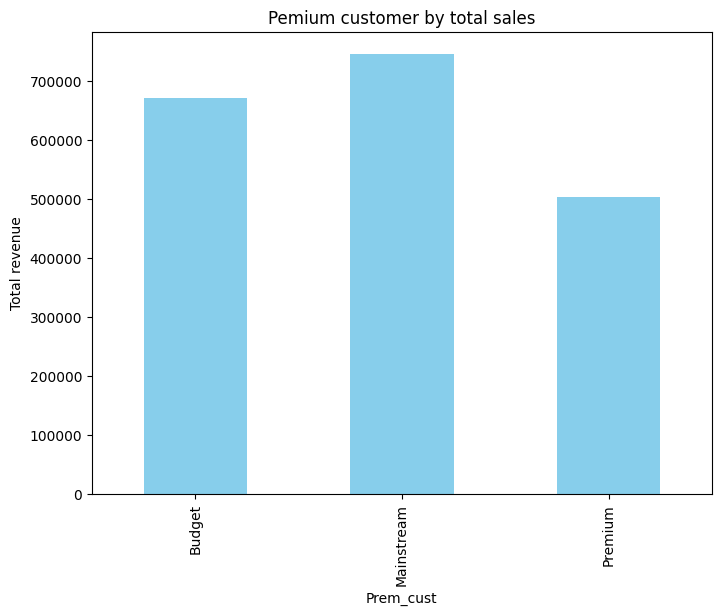

In [56]:
import matplotlib.pyplot as plt

#plot bar graph of 'PREMIUM_CUSTOMER' by 'TOTAL SALES'
sales =cleaned_df.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
plt.figure(figsize=(8,6))
sales.plot(kind= 'bar', color = 'skyblue')
plt.title('Pemium customer by total sales')
plt.ylabel('Total revenue')
plt.xlabel('Prem_cust')
plt.show()

In [57]:
#finding the sum of total sales and Product qauantity
total_sales = cleaned_df['TOT_SALES'].sum()
total_product_qty = cleaned_df['PROD_QTY'].sum()

print("Total sales:{}".format(total_sales))
print("Total product quantity:{}".format(total_product_qty))

Total sales:1921756.9500000004
Total product quantity:502163


In [58]:
last_date = cleaned_df['DATE'].max()
early_date = cleaned_df['DATE'].min()
print("last_date:{} and early_date:{}".format(last_date, early_date))

last_date:43646 and early_date:43282


In [59]:
unique_values = cleaned_df['LYLTY_CARD_NBR'].unique()
print(len(unique_values))

72588


In [42]:
unique_values = cleaned_df['PREMIUM_CUSTOMER'].unique()
print(unique_values)

['Mainstream' 'Budget' 'Premium']


#Customer Segmentation
*Creating columns for recency,frequency & monetary.

In [60]:
#checking for recency
recency = cleaned_df.groupby('LYLTY_CARD_NBR').agg({'DATE': 'max'}).reset_index()
recency.columns = ['LYLTY_CARD_NBR','last_trans']
recency['recency'] =(last_date-recency['last_trans'])
recency=recency.drop(['last_trans'],axis=1)
recency

,LYLTY_CARD_NBR,recency
0,1000,256
1,1002,287
2,1003,114
3,1004,240
4,1005,184
...,...,...
72583,2370651,331
72584,2370701,204
72585,2370751,272
72586,2370961,246


In [61]:
#check for frequency
frequency = cleaned_df.groupby('LYLTY_CARD_NBR').agg({'TOT_SALES': 'count'}).reset_index()
frequency.columns=['LYLTY_CARD_NBR','frequency']
frequency

,LYLTY_CARD_NBR,frequency
0,1000,1
1,1002,1
2,1003,2
3,1004,1
4,1005,1
...,...,...
72583,2370651,1
72584,2370701,1
72585,2370751,1
72586,2370961,2


In [62]:
monetary= cleaned_df.groupby('LYLTY_CARD_NBR').agg({'TOT_SALES':'sum'}).reset_index()
monetary.columns=['LYLTY_CARD_NBR','monetary']
monetary

,LYLTY_CARD_NBR,monetary
0,1000,6.0
1,1002,2.7
2,1003,6.6
3,1004,1.9
4,1005,2.8
...,...,...
72583,2370651,13.0
72584,2370701,7.2
72585,2370751,9.2
72586,2370961,18.6


In [63]:
#merge the recency,frequency and monetary into rfm
rfm =recency.merge(frequency, on='LYLTY_CARD_NBR')
rfm=rfm.merge(monetary, on='LYLTY_CARD_NBR')
rfm

,LYLTY_CARD_NBR,recency,frequency,monetary
0,1000,256,1,6.0
1,1002,287,1,2.7
2,1003,114,2,6.6
3,1004,240,1,1.9
4,1005,184,1,2.8
...,...,...,...,...
72583,2370651,331,1,13.0
72584,2370701,204,1,7.2
72585,2370751,272,1,9.2
72586,2370961,246,2,18.6


In [64]:
rfm.describe()

,LYLTY_CARD_NBR,recency,frequency,monetary
count,7.258800e+04,72588.000000,72588.000000,72588.000000
mean,1.362046e+05,104.810809,3.640519,26.474857
std,8.989976e+04,93.308878,2.625923,20.149520
min,1.000000e+03,0.000000,1.000000,1.500000
25%,6.620975e+04,29.000000,1.000000,9.100000
50%,1.340465e+05,75.000000,3.000000,21.600000
75%,2.033812e+05,159.000000,5.000000,39.800000
max,2.373711e+06,364.000000,18.000000,138.600000


In [65]:
#check for recency
recency = cleaned_df.groupby('LYLTY_CARD_NBR').agg({'DATE': 'max'}).reset_index()
recency.columns = ['LYLTY_CARD_NBR','last_trans']
recency['recency'] =(last_date-recency['last_trans'])
recency=recency.drop(['last_trans'],axis=1)

#check for frequency
frequency = cleaned_df.groupby('LYLTY_CARD_NBR').agg({'TOT_SALES': 'count'}).reset_index()
frequency.columns=['LYLTY_CARD_NBR','frequency']

#check for monetary
monetary= cleaned_df.groupby('LYLTY_CARD_NBR').agg({'TOT_SALES':'sum'}).reset_index()
monetary.columns=['LYLTY_CARD_NBR','monetary']

#merge the recency,frequency and monetary into rfm
rfm =recency.merge(frequency, on='LYLTY_CARD_NBR')
rfm=rfm.merge(monetary, on='LYLTY_CARD_NBR')

# Now continue with your quartile calculations
import pandas as pd # Import the pandas library and alias it as 'pd'
# Split recency into quartiles
rfm['r_quartile'] = pd.qcut(rfm['recency'], q=4, labels=[1,2,3,4])
# Split frequency into quartiles

# Determine the number of unique bins after dropping duplicates
n_bins = pd.qcut(rfm['frequency'], q=4, duplicates='drop').nunique()

# Adjust labels to match the number of bins
labels = range(1, n_bins + 1)

rfm['f_quartile'] = pd.qcut(rfm['frequency'], q=4, labels=labels, duplicates='drop').astype(int)
# Split monetary into quartiles
rfm['m_quartile'] = pd.qcut(rfm['monetary'], q=4, labels=[1,2,3,4])
rfm

,LYLTY_CARD_NBR,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,1000,256,1,6.0,4,1,1
1,1002,287,1,2.7,4,1,1
2,1003,114,2,6.6,3,1,1
3,1004,240,1,1.9,4,1,1
4,1005,184,1,2.8,4,1,1
...,...,...,...,...,...,...,...
72583,2370651,331,1,13.0,4,1,2
72584,2370701,204,1,7.2,4,1,1
72585,2370751,272,1,9.2,4,1,2
72586,2370961,246,2,18.6,4,1,2


In [66]:
#create a class score from rfm
rfm['class_score'] = rfm['r_quartile'].astype(str) + rfm['f_quartile'].astype(str) + rfm['m_quartile'].astype(str)

#check table
rfm

,LYLTY_CARD_NBR,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,class_score
0,1000,256,1,6.0,4,1,1,411
1,1002,287,1,2.7,4,1,1,411
2,1003,114,2,6.6,3,1,1,311
3,1004,240,1,1.9,4,1,1,411
4,1005,184,1,2.8,4,1,1,411
...,...,...,...,...,...,...,...,...
72583,2370651,331,1,13.0,4,1,2,412
72584,2370701,204,1,7.2,4,1,1,411
72585,2370751,272,1,9.2,4,1,2,412
72586,2370961,246,2,18.6,4,1,2,412


In [67]:
unique_values = rfm['class_score'].unique()
print(unique_values)

['411' '311' '412' '422' '112' '111' '212' '211' '222' '312' '122' '223'
 '322' '323' '123' '113' '413' '224' '124' '213' '423' '434' '234' '134'
 '313' '324' '424' '334' '233' '333' '133' '433' '132' '232']


In [68]:
#create a customer segment
segment_mapping_descending = {
   '134': 'Champions',           #(Champions)---Bought recently,buy often and spend the most
   '133': 'Champions',

   '132': 'loyal',              #(Loyal Customers)---Buy on regular basis.Responsive to promotions.
   '123': 'loyal',
   '124': 'loyal',
   '122': 'loyal',

    '113': 'Promising Customers', #(Promising Customers)---Recent customers with average frequency
    '112': 'Promising Customers',
    '111': 'Promising Customers',
    '234': 'Promising Customers',
    '232': 'Promising Customers',
    '213': 'Promising Customers',
    '224': 'Promising Customers',
    '223': 'Promising Customers',



    '222': 'Customers needing attention', #(Customers needing attention)---Above average frequency, recency and monetary values{may not have bought recently though}
    '211': 'Customers needing attention',
    '212': 'Customers needing attention',



    '334': 'Cannot loose them',              #(Can't loose them)---Customers below average recency and frequency.Will loose them if not reactivated.
    '333': 'Cannot loose them',
    '324': 'Cannot loose them',
    '313': 'Cannot loose them',
    '323': 'Cannot loose them',


    '322': 'Hibernating',                     #(Hibernating)---Last purchase was long back and low number of orders.
    '312': 'Hibernating',
    '311': 'Hibernating',
    '434': 'Hibernating',
    '433': 'Hibernating',
    '424': 'Hibernating',
    '423': 'Hibernating',



    '413': 'Lost',                        #(Lost)---Purchased long time ago and never came back.
    '422': 'Lost',
    '412': 'Lost',
    '411': 'Lost'
}
# Create a new column 'segment' by mapping class scores to segments
rfm['segment'] = rfm['class_score'].map(segment_mapping_descending)

# Display the resulting DataFrame
rfm

,LYLTY_CARD_NBR,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,class_score,segment
0,1000,256,1,6.0,4,1,1,411,Lost
1,1002,287,1,2.7,4,1,1,411,Lost
2,1003,114,2,6.6,3,1,1,311,Hibernating
3,1004,240,1,1.9,4,1,1,411,Lost
4,1005,184,1,2.8,4,1,1,411,Lost
...,...,...,...,...,...,...,...,...,...
72583,2370651,331,1,13.0,4,1,2,412,Lost
72584,2370701,204,1,7.2,4,1,1,411,Lost
72585,2370751,272,1,9.2,4,1,2,412,Lost
72586,2370961,246,2,18.6,4,1,2,412,Lost


In [69]:
unique_segment = rfm['segment'].unique()

# Display unique values
print(unique_segment)

['Lost' 'Hibernating' 'Promising Customers' 'Customers needing attention'
 'loyal' 'Cannot loose them' 'Champions' nan]


In [70]:
value_counts = rfm['segment'].value_counts().sort_values(ascending=False)
print(value_counts)

segment
Promising Customers            16753
Lost                           16651
Hibernating                    11096
Cannot loose them               8417
Champions                       7970
Customers needing attention     6572
loyal                           4477
Name: count, dtype: int64


<ipython-input-71-a488508db9f1>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_rfm = rfm.groupby('segment').agg(


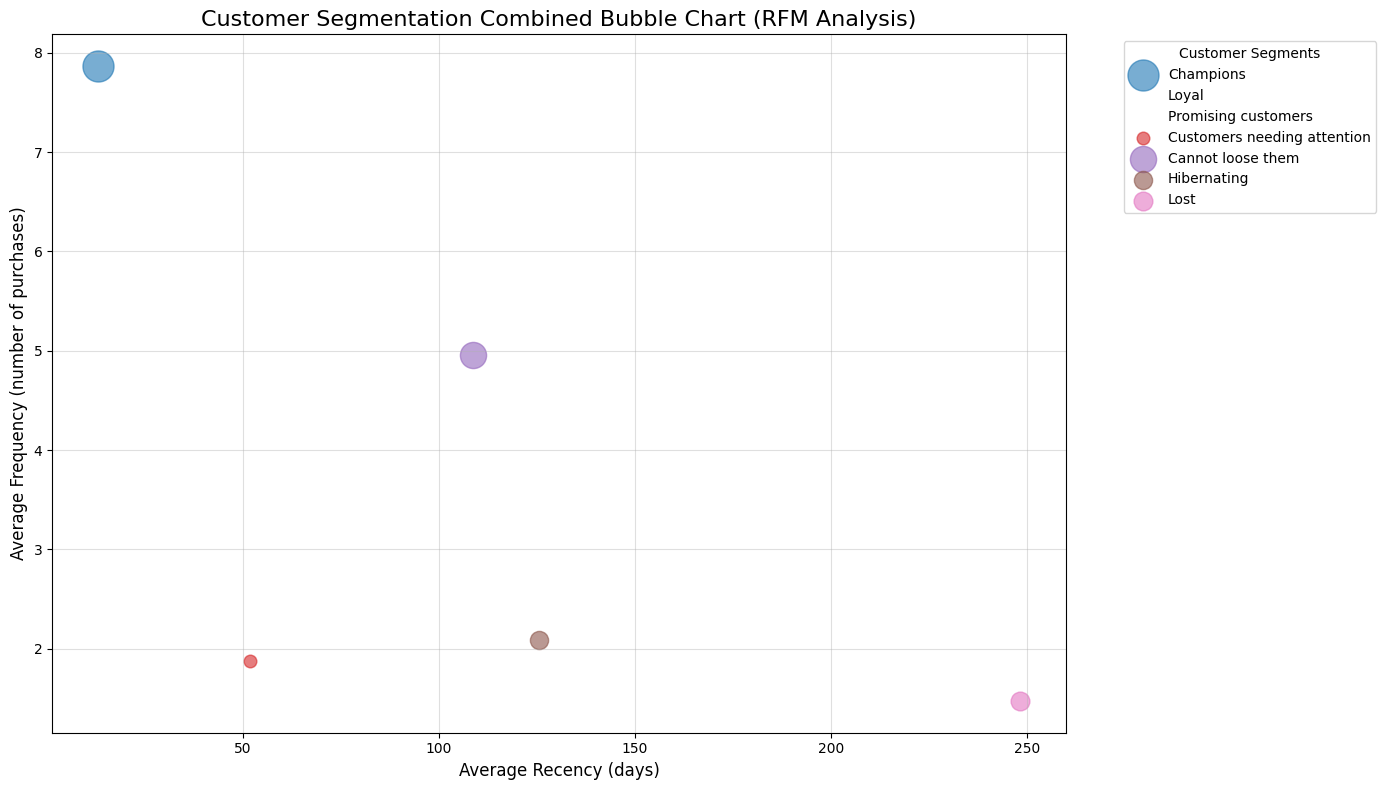

In [71]:
# Convert data to DataFrame
rfm.head()


# Sort segments in descending order based on predefined hierarchy
segment_order = [
    'Champions', 'Loyal', 'Promising customers',
    'Customers needing attention', 'Cannot loose them',
     'Hibernating', 'Lost'
]
rfm['segment'] = pd.Categorical(rfm['segment'], categories=segment_order, ordered=True)
rfm.sort_values('segment', inplace=True)

# Aggregate data by segment to calculate the average recency, frequency, and total monetary
aggregated_rfm = rfm.groupby('segment').agg(
    recency=('recency', 'mean'),
    frequency=('frequency', 'mean'),
    monetary=('monetary', 'sum')
).reset_index()

# Normalize monetary values for bubble sizes
aggregated_rfm['bubble_size'] = aggregated_rfm['monetary'] / aggregated_rfm['monetary'].max() * 500

# Plot the combined bubble chart
plt.figure(figsize=(14, 8))

# Plot each segment as a single bubble
for index, row in aggregated_rfm.iterrows():
    plt.scatter(
        row['recency'],
        row['frequency'],
        s=row['bubble_size'],
        label=row['segment'],
        alpha=0.6
    )

# Add chart details
plt.title('Customer Segmentation Combined Bubble Chart (RFM Analysis)', fontsize=16)
plt.xlabel('Average Recency (days)', fontsize=12)
plt.ylabel('Average Frequency (number of purchases)', fontsize=12)
plt.legend(title='Customer Segments', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4)
plt.tight_layout()

# Display the chart
plt.show()


#Strategies to Mitigate in various segments to Boost Sales Revenue
1.(CHAMPIONS)
Description:Recently purchased, frequent buyers & top spenders.
Strategy:Implement a VIP program with exclusive rewards to reinforce
their loyalty.

2.(LOYAL CUSTOMERS)
Description:Regularly spend a substantial amount with us.
Strategy: Show appreciation for your regular customers by offering them         discounts or loyalty rewards

3.(PROMISING CUSTOMERS)
DESCRIPTION:Customers who have recently joined us but have not made significant
purchases yet.
STRATEGY:Nurture their interest in our brands through special promotions and
introductory offers.

4.(CUSTOMERS NEEDING ATTENTION)
DESCRIPTION:Not recent buyers, but have previously made substantial purchases.
STRATEGY:Launch a win back campaign with personalized offers to re-engage them.

5.(CANNOT LOSE THEM)
DESCRIPTION:Made frequent and significant purchases in the past but have been inactive for an extended period.
STRATEGY:Reach out with personalized communication, introduce new products and incentives tailored to their interest.

6.(HIBERNATING)
DESCRIPTION:Infrequent purchasers with low spending habits. Their last purchase was some time ago.
STRATEGY:Implement a reactivation and campaign with compelling offers and reminders of the benefits of purchasing from our brand.

7.(LOST CUSTOMERS)
DESCRIPTION:Lowest recency, frequency and monetary.
STRATEGY:Reach out and gather feedback to identify areas for improvement. Demonstrate commitment to address their concerns.
